## **LETS GROW MORE Data Science Internship Beginner Level-3 on Music Recommendation** 
---

### **LGMVIP (August - 2022)**

### **TASK 3 - MUSIC RECOMMENDATION**

### AUTHOR- **NISARG SONAR**

### DATA SET LINK - https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

---

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import string
import math
import missingno as msno

In [ ]:
# data viz
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# from autoviz.AutoViz_Class import AutoViz_Class
# %matplotlib inline
import plotly.express as px
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

In [ ]:
# sklearn - ML models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# lightgbm
import lightgbm as lgbm

# xgboost
import xgboost as xgb


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
# catboost
import catboost as cb

In [ ]:
songs_df = pd.read_csv("songs.csv")
songs_extra_df = pd.read_csv("song_extra_info.csv")
members_df = pd.read_csv("members.csv")
train_df = pd.read_csv("train.csv", nrows = 100000)
t_s = pd.merge(train_df, songs_df, on='song_id', how='left')
t_s_se = pd.merge(t_s, songs_extra_df, on='song_id', how='left')
songs = pd.merge(t_s_se, members_df, on='msno', how='left')
del songs_df, songs_extra_df, members_df, train_df, t_s, t_s_se
# songs = songs.head(100)
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,7.0,20120102.0,20171005.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,24.0,female,9.0,20110525.0,20170911.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,24.0,female,9.0,20110525.0,20170911.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,24.0,female,9.0,20110525.0,20170911.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Sleep Without You,QM3E21606003,1.0,0.0,NaN,7.0,20120102.0,20171005.0


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70272 entries, 0 to 70271
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    70272 non-null  object 
 1   song_id                 70271 non-null  object 
 2   source_system_tab       70064 non-null  object 
 3   source_screen_name      67656 non-null  object 
 4   source_type             70148 non-null  object 
 5   target                  70271 non-null  float64
 6   song_length             33158 non-null  float64
 7   genre_ids               32654 non-null  object 
 8   artist_name             33158 non-null  object 
 9   composer                26204 non-null  object 
 10  lyricist                19861 non-null  object 
 11  language                33158 non-null  float64
 12  name                    21157 non-null  object 
 13  isrc                    19226 non-null  object 
 14  city                    70271 non-null

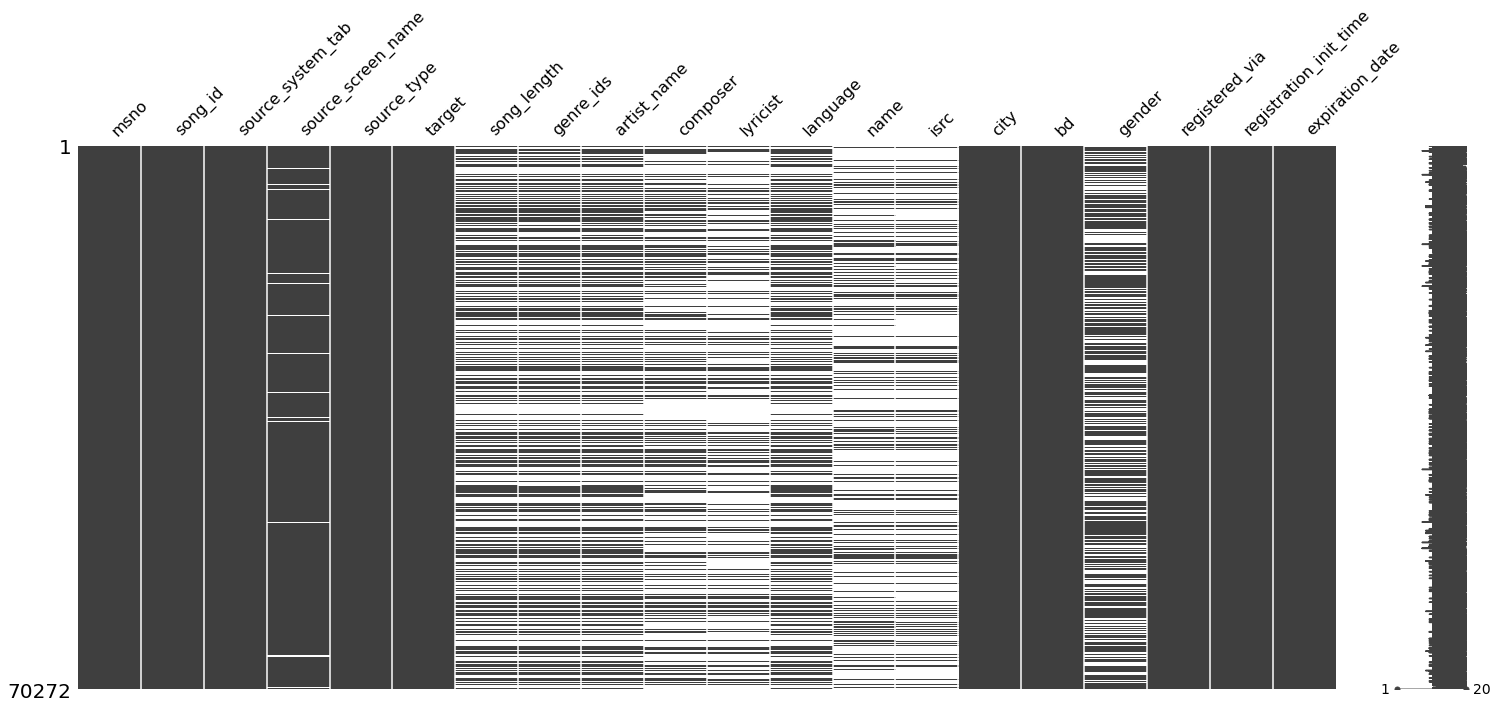

In [ ]:
msno.matrix(songs)

In [ ]:
for i in songs.select_dtypes(include=['object']).columns:
    songs[i][songs[i].isnull()] = 'unknown'
songs = songs.fillna(value=0)
#Missing Values Fill

In [ ]:
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,0.0,unknown,unknown,unknown,unknown,0.0,unknown,unknown,1.0,0.0,unknown,7.0,20120102,20171005.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,0.0,unknown,unknown,unknown,unknown,0.0,unknown,unknown,13.0,24.0,female,9.0,20110525,20170911.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,0.0,unknown,unknown,unknown,unknown,0.0,unknown,unknown,13.0,24.0,female,9.0,20110525,20170911.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,0.0,unknown,unknown,unknown,unknown,0.0,unknown,unknown,13.0,24.0,female,9.0,20110525,20170911.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,0.0,unknown,unknown,unknown,unknown,0.0,Sleep Without You,QM3E21606003,1.0,0.0,unknown,7.0,20120102,20171005.0


In [ ]:
label_encoder = LabelEncoder()
one_hot = OneHotEncoder()

for i in songs.columns :
    songs[i] = label_encoder.fit_transform(songs[i])

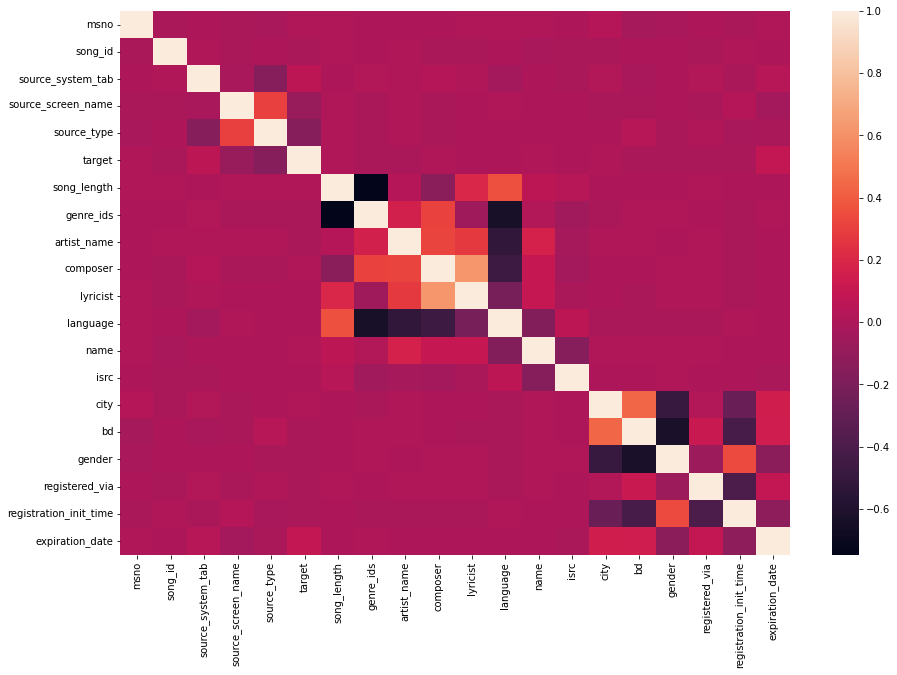

In [ ]:
# Сorrelation matrix
plt.figure(figsize=[15,10])
sns.heatmap(songs.corr())
plt.show()

In [ ]:
#Modelling
X = songs.drop('target', axis = 1)
y = songs.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
def model_with(model_name, X_train, X_val, y_train, y_val) :
    print("==================================================")
    print("Modeling with :", model_name)
    print()
        
    if model_name == "Random Forest Classifier" :
        model = RandomForestClassifier(
            n_estimators=1000, 
        )
    elif model_name == "Extra Trees Classifier" :
        model = ExtraTreesClassifier(
            n_estimators=1000, 
        )
    elif model_name == "LightGBM Classifier" :
        model = lgbm.LGBMClassifier(
            n_estimators=1000, 
        )
    elif model_name == "XGBoost Classifier" :
        model = xgb.XGBClassifier(
            n_estimators=1000, 
        )
    elif model_name == "CatBoost Classifier" :
        model = cb.CatBoostClassifier(
            n_estimators=1000, 
            verbose=0
        )
    else :
        print("Model not found in function.")
        
    model.fit(X_train, y_train)
    
    val_pred = model.predict(X_val)
    print(classification_report(y_val, val_pred))
    print()
    print("Accuracy :", accuracy_score(y_val, val_pred))
    print("ROC :", roc_auc_score(y_val, val_pred))
    
    print("==================================================")
    print()

In [ ]:
models = ["Random Forest Classifier", "Extra Trees Classifier", "LightGBM Classifier", "XGBoost Classifier", "CatBoost Classifier"]
for i in models :
    model_with(i, X_train, X_val, y_train, y_val)

Modeling with : Random Forest Classifier

              precision    recall  f1-score   support

           0       0.72      0.54      0.62      4370
           1       0.86      0.93      0.89     13198

    accuracy                           0.83     17568
   macro avg       0.79      0.73      0.75     17568
weighted avg       0.82      0.83      0.82     17568


Accuracy : 0.8324795081967213
ROC : 0.7344470228656099

Modeling with : Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.69      0.53      0.60      4370
           1       0.85      0.92      0.89     13198

    accuracy                           0.82     17568
   macro avg       0.77      0.72      0.74     17568
weighted avg       0.81      0.82      0.81     17568


Accuracy : 0.8224612932604736
ROC : 0.7231874290640389

Modeling with : LightGBM Classifier

              precision    recall  f1-score   support

           0       0.75      0.50      0.60      4370
    

In [ ]:
rf = RandomForestClassifier(
        n_estimators = 1000,
        class_weight={0: 1.0050505050505052, 1: 0.9949494949494948}
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0050505050505052,
                                     1: 0.9949494949494948},
                       n_estimators=1000)

In [ ]:
val_pred = rf.predict(X_val)
print("Accuracy :", accuracy_score(y_val, val_pred)*100)

Accuracy : 83.23087431693989
